<a href="https://colab.research.google.com/github/AAdewunmi/Online-Course-Recommendation-App-Project/blob/main/EDA_On_UdemyDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Udemy Dataset Exploratory Data Analysis (EDA) README

## Overview

This project performs **Exploratory Data Analysis (EDA)** on a Udemy courses dataset. The goal is to uncover insights about course content, pricing, subscribers, and trends across time and categories. The analysis leverages Python’s data analysis stack to answer a set of guiding business and product questions.

## Objectives

The notebook investigates questions such as:

* **Course Titles**: frequent words, longest/shortest titles, title-based recommendation ideas.
* **Subjects/Categories**: distribution across categories, popularity trends per year, subscriber preferences.
* **Published Year**: growth of courses over time, identification of peak years.
* **Levels**: distribution of course difficulty levels and their popularity.
* **Duration**: how course length correlates with subscribers and pricing.
* **Subscribers**: most popular courses, average subscribers, breakdown per subject/year.
* **Pricing**: average, minimum, maximum prices, revenue estimates, most profitable courses.
* **Correlations**: relationship between subscribers and reviews, price, lectures, and duration.

## Tech Stack

* **Python 3.x**
* **Jupyter Notebook**
* Libraries:

  * `pandas` for data manipulation
  * `numpy` for numerical analysis
  * `matplotlib` / `seaborn` for visualization

## Repository Contents

* `EDA on UdemyDataset.ipynb` – the main notebook with all analysis and visualizations.
* `README.md` – this documentation.

## How to Run

1. Clone this repository.
2. Install dependencies:

   ```bash
   pip install pandas numpy matplotlib seaborn jupyter
   ```
3. Launch Jupyter Notebook:

   ```bash
   jupyter notebook
   ```
4. Open and run all cells in `EDA on UdemyDataset.ipynb`.

## Insights (Expected Outcomes)

* Identification of which subjects and years drive Udemy’s growth.
* Understanding of how pricing and duration influence subscriber numbers.
* Discovery of correlations between course metrics (reviews, lectures, duration, price) and popularity.
* Recommendations for content strategy and pricing models.

---




#**Exploratory Data Analysis on UdemyCleanedTitle Dataset**

**Questions to Solve**

* Course Title

  * What is the most frequent words in course title
  * Longest/Shortest course title
  * How can we build recommendation systems via title using similarity
  * Most famous courses by number of subscribers

* Subjects/Category

  * What is the distribution of subjects
  * How many courses per subject
  * Distribution of subjects per year
  * How many people purchase a particular subject
  * Which subject is the most popular

* Published Year

  * Number of courses per year
  * Which year has the highest number of courses
  * What is the trend of courses per year

* Levels

  * How many levels do we have
  * What is the distribution of courses per levels
  * Which subject have the highest levels
  * How many subscribers per levels
  * How many courses per levels

* Duration of Course

  * Which courses have the highest duration (paid or not)
  * Which courses have higher duration
  * Duration vs number of subscribers

* Subscribers

  * Which course have the highest number of subscribers
  * Average number of subscribers
  * Number of subscribers per Subject
  * Number of subscribers per year

* Price

  * What is the average price of a course
  * What is the min/max price
  * How much does Udemy earn
  * The most profitable courses

* Correlation Questions

  * Does number of subscribers depend on
  * number of reviews
  * price
  * number of lectures
  * content duration

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Read file and print first 5 rows

df = pd.read_csv('sample_data/udemy_course_data.csv')

df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [ ]:
# Print a concise summary of a DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

#**EDA on Subject/Category**

* Subjects/Category
  * What is the distribution of subjects
  * How many courses per subject
  * Distribution of subjects per year
  * How many people purchase a particular subject
  * Which subject is the most popular

In [ ]:
# Count unique course titles

len(df['course_title'].unique())

3668

<Axes: xlabel='subject', ylabel='count'>

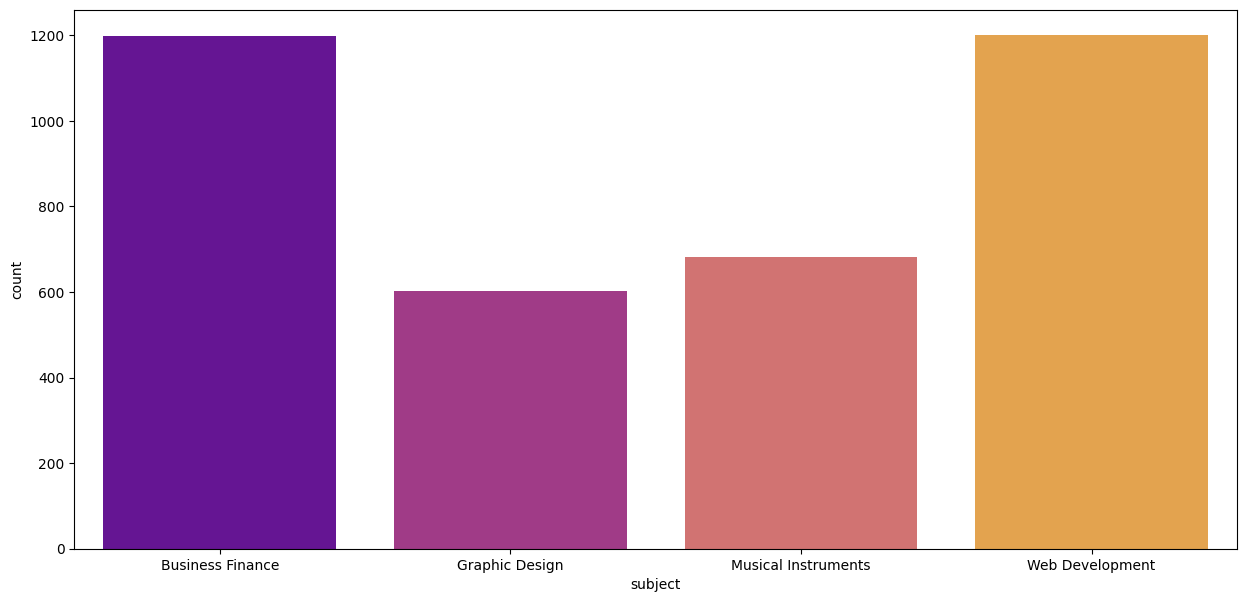

In [ ]:
# Visualisation for course subjects

plt.figure(figsize=(15,7))
sn.countplot(x=df['subject'],hue=df['subject'],legend=False,palette='plasma')

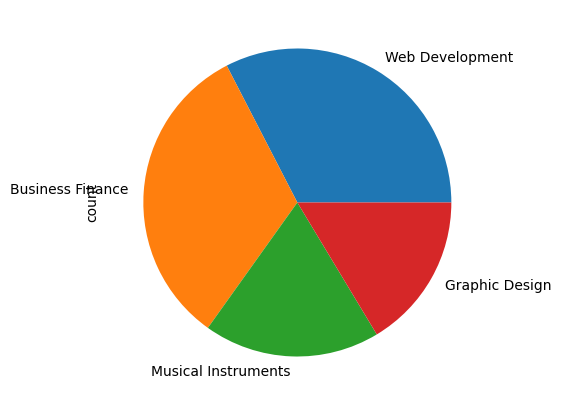

In [ ]:
# Pie chart visualisation of subjects

plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

#**EDA on Subscribers**
* Subscribers
  * Which course have the highest number of subscribers
  * Average number of subscribers
  * Number of subscribers per Subject
  * Number of subscribers per year

<Axes: ylabel='subject'>

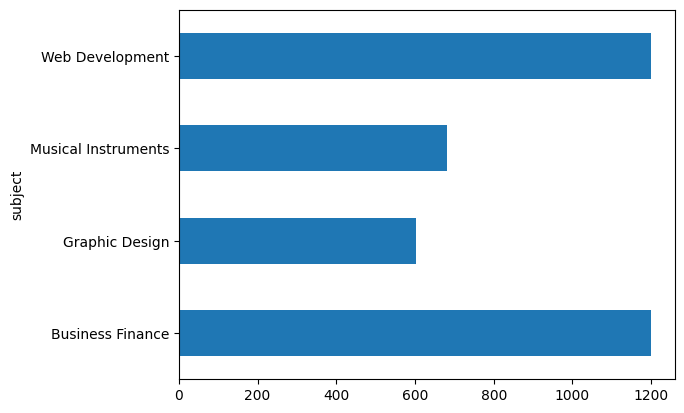

In [ ]:
# Horizontal bar chart showing the number of courses
# available for each subject

df.groupby('subject')['num_subscribers'].count().plot(kind='barh')

<Axes: ylabel='subject'>

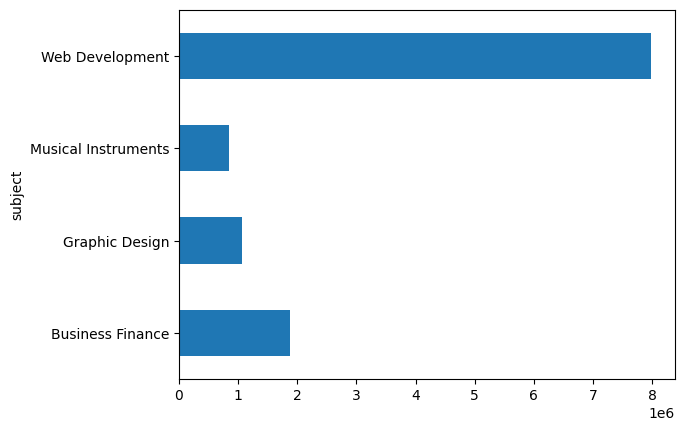

In [ ]:
# Visualization for total subscribers by subject"

df.groupby('subject')['num_subscribers'].sum().plot(kind='barh')

<Axes: ylabel='num_subscribers'>

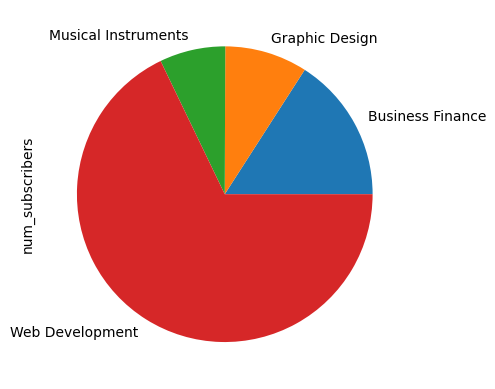

In [ ]:
# Pie chart of total subscribers per subject

df.groupby('subject')['num_subscribers'].sum().plot(kind='pie')

#**EDA on Levels**
* Levels
  * How many levels do we have
  * What is the distribution of courses per levels
  * Which subject have the highest levels
  * How many subscribers per levels
  * How many courses per levels

<Axes: ylabel='level'>

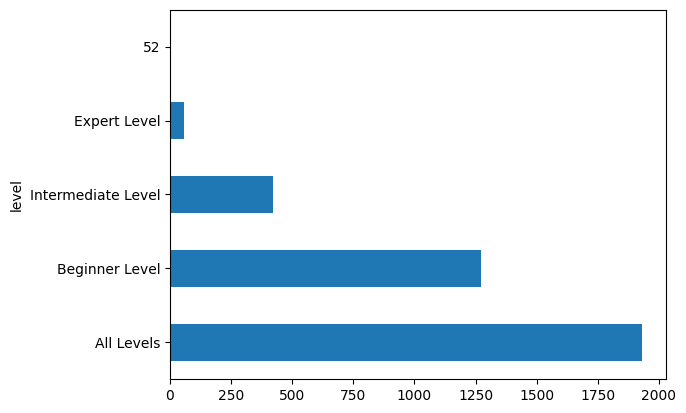

In [ ]:
# Visualize count of each level as horizontal bar chart

df['level'].value_counts().plot(kind='barh')

<Axes: ylabel='level'>

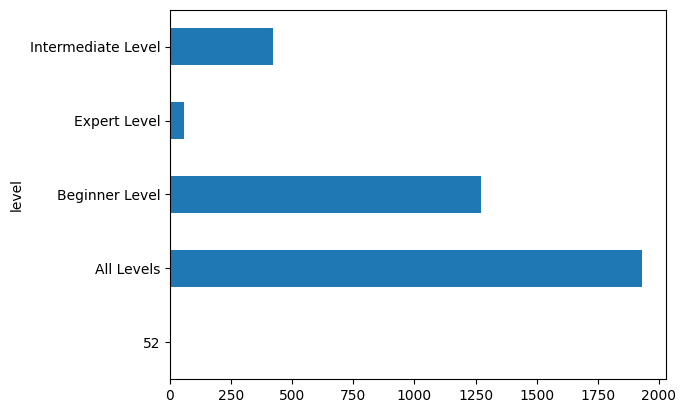

In [ ]:
# Grouping the level as per persons interest

df.groupby(['level'])['num_subscribers'].count().plot(kind='barh')

<Axes: xlabel='level'>

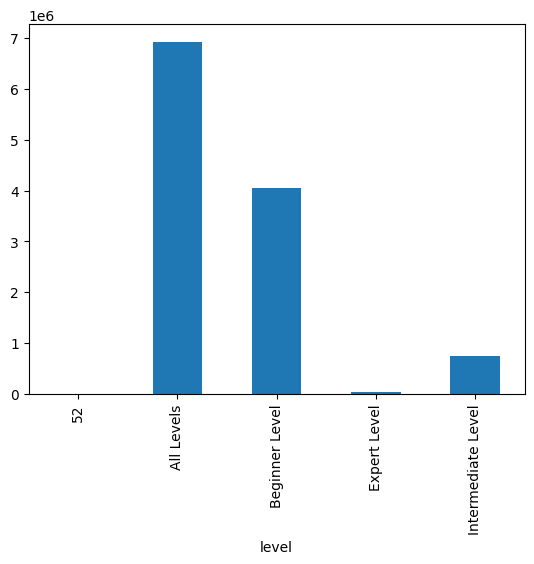

In [ ]:
# Plot total subscribers per level as bar chart

df.groupby(['level'])['num_subscribers'].sum().plot(kind='bar')

<Axes: xlabel='subject'>

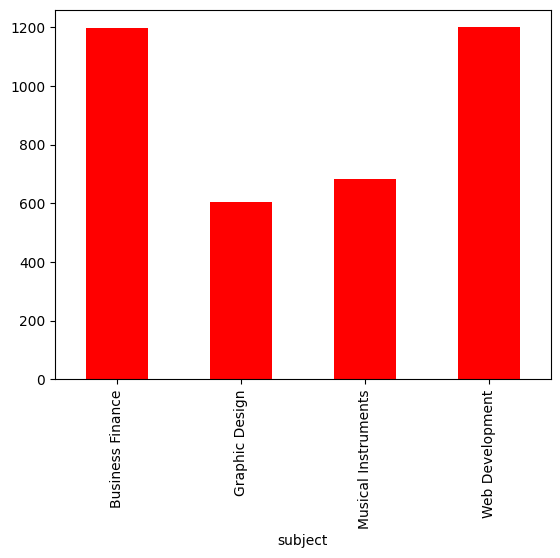

In [ ]:
# Show count of levels by subject as red bar chart

df.groupby(['subject'])['level'].count().plot(kind='bar',color='red')

Text(0, 0.5, 'Count of Levels')

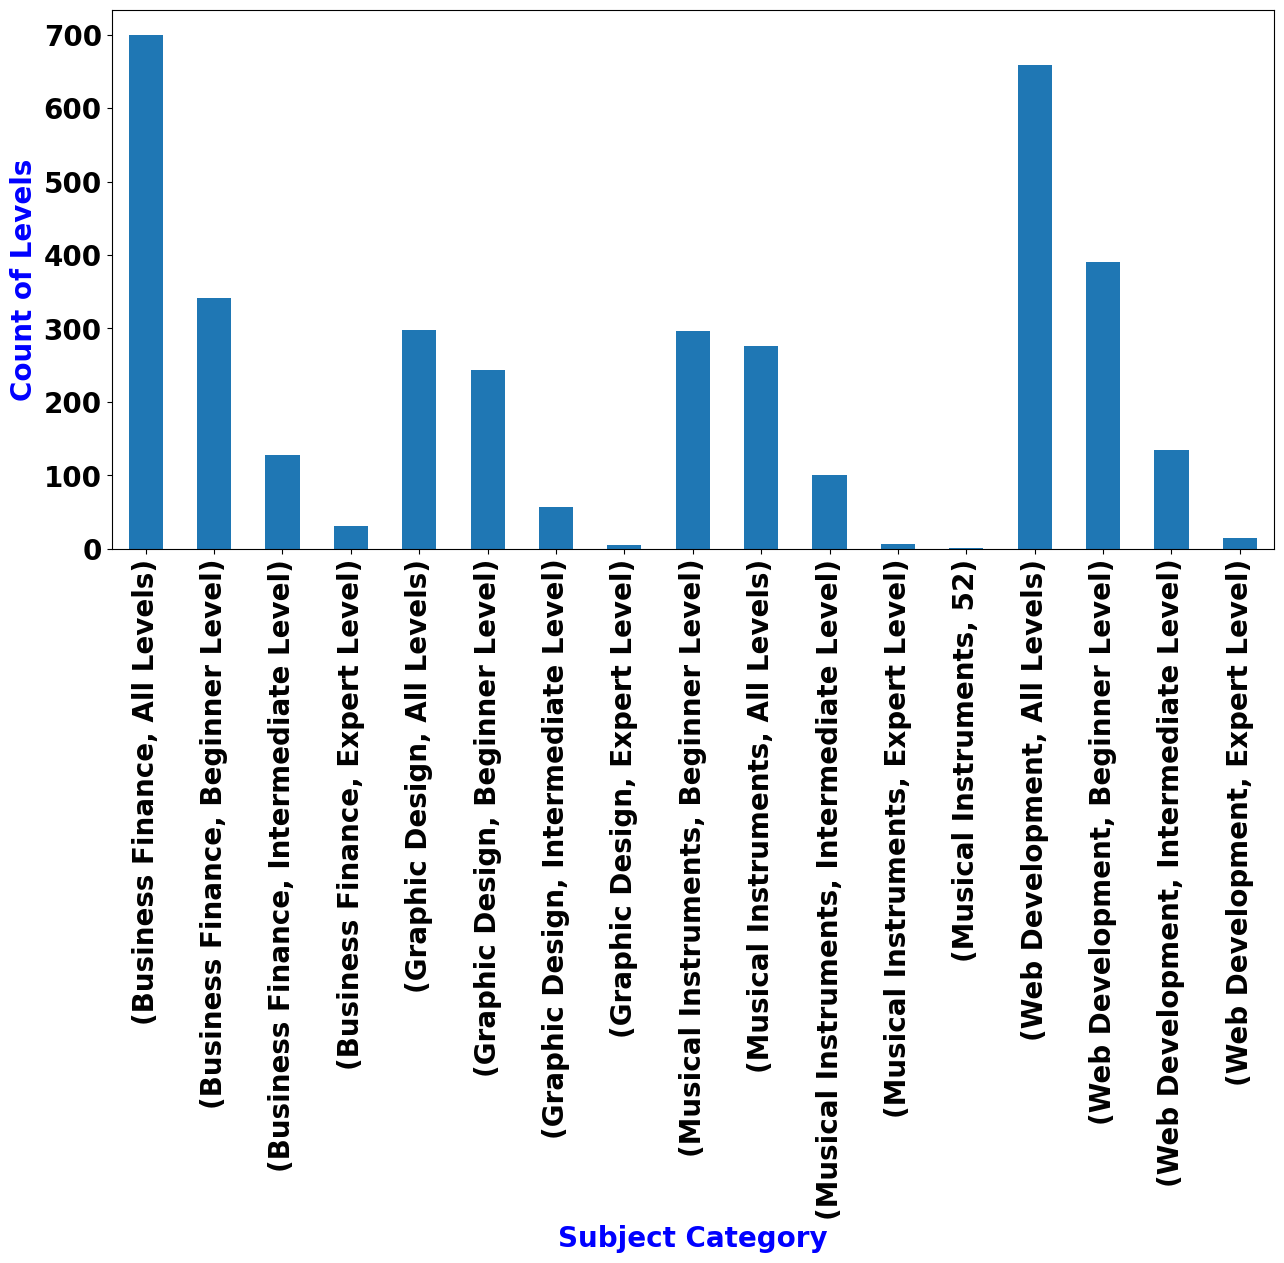

In [ ]:
# Grouped level count bar chart with custom axis formatting

plt.figure(figsize=(15,7))
df.groupby(['subject'])['level'].value_counts().plot(kind='bar')
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.xlabel('Subject Category',fontsize=20,fontweight='bold',color='blue')
plt.ylabel('Count of Levels', fontsize=20,fontweight='bold',color='blue')

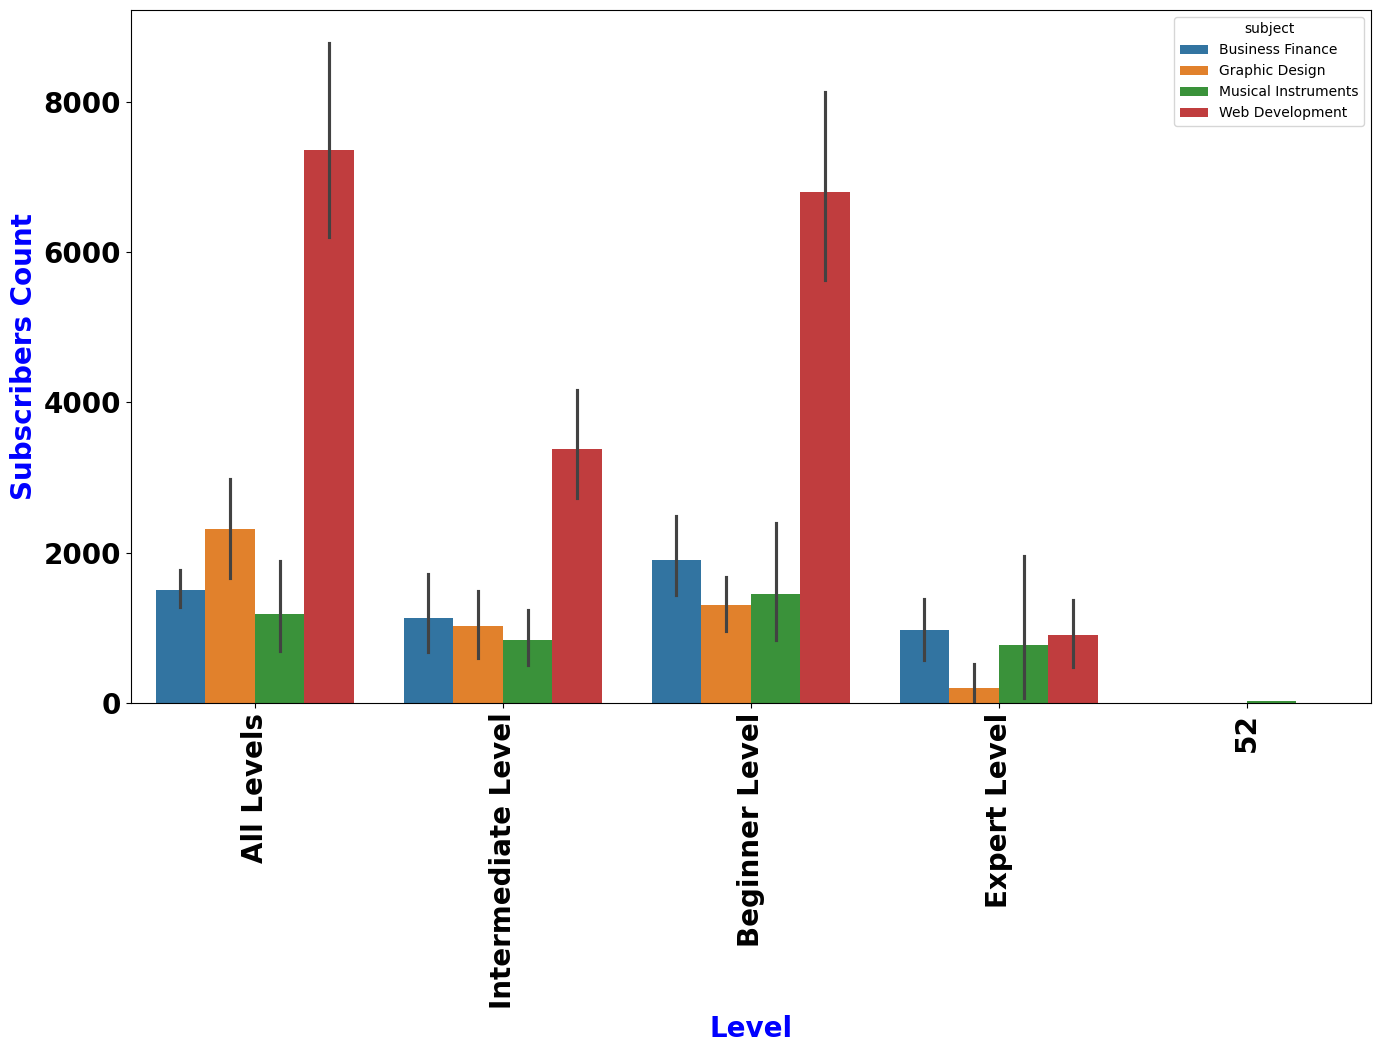

In [ ]:
# Add seaborn barplot of subscribers by level and subject with styled axes

plt.figure(figsize=(16,9))
sn.barplot(x='level', y='num_subscribers', hue='subject',data=df)
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.xlabel('Level',fontsize=20,fontweight='bold',color='blue')
plt.ylabel('Subscribers Count',fontsize=20,fontweight='bold',color='blue')
plt.xticks(rotation='vertical')
plt.show()




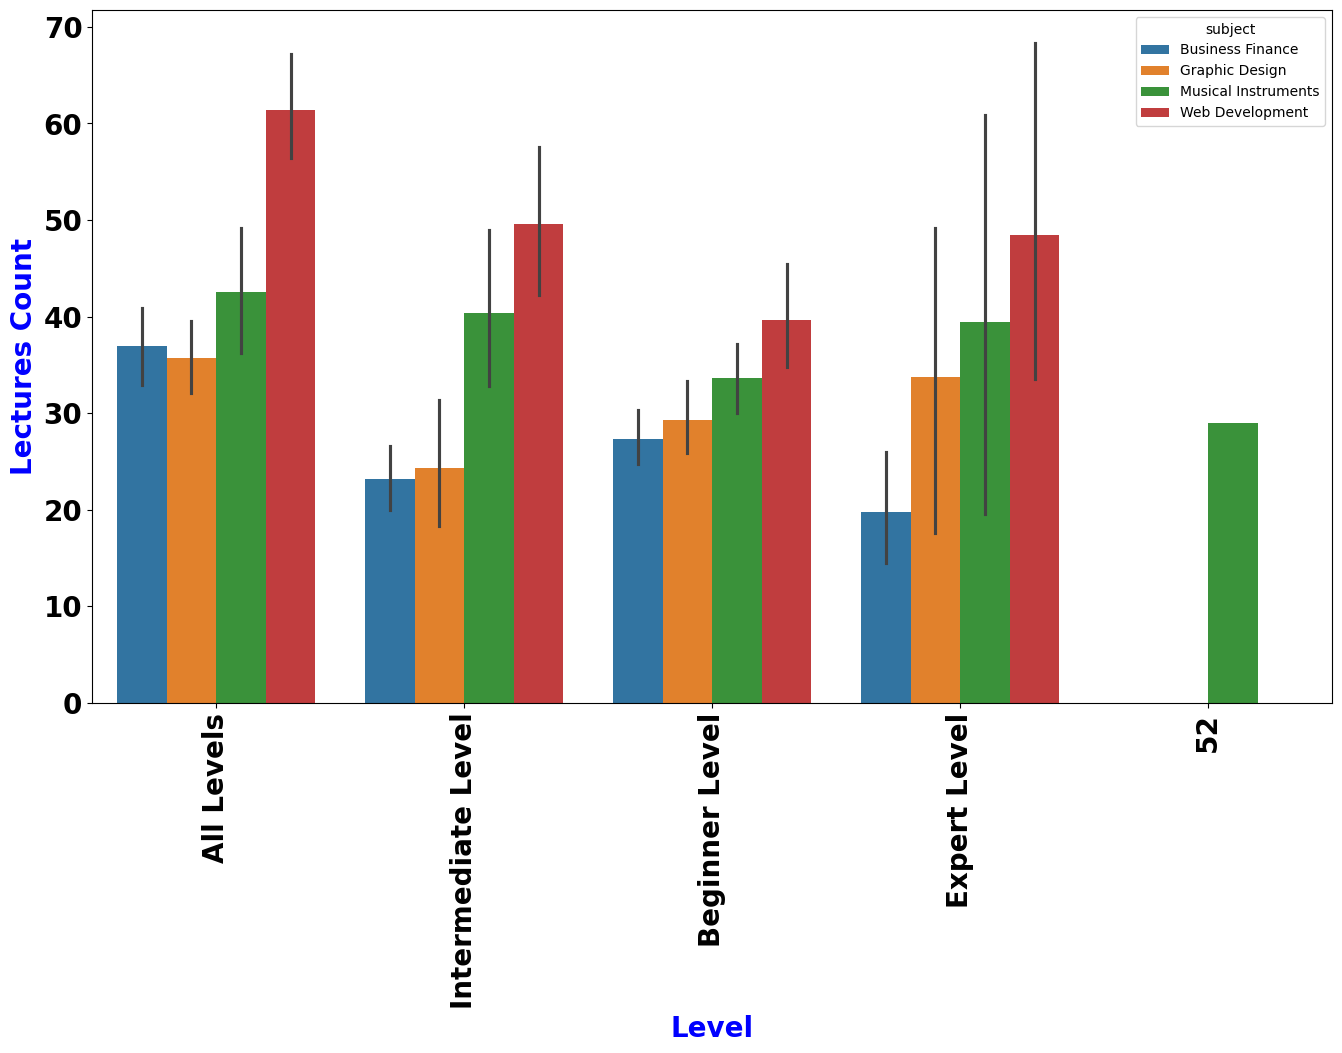

In [ ]:
# Seaborn barplot of lecture counts by level and subject with styled axes

plt.figure(figsize=(16,9))
sn.barplot(x='level', y='num_lectures', hue='subject',data=df)
plt.xticks(fontsize=20,fontweight='bold')
plt.yticks(fontsize=20,fontweight='bold')
plt.xlabel('Level',fontsize=20,fontweight='bold',color='blue')
plt.ylabel('Lectures Count',fontsize=20,fontweight='bold',color='blue')
plt.xticks(rotation='vertical')
plt.show()





In [ ]:
# Inspect DataFrame columns

df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

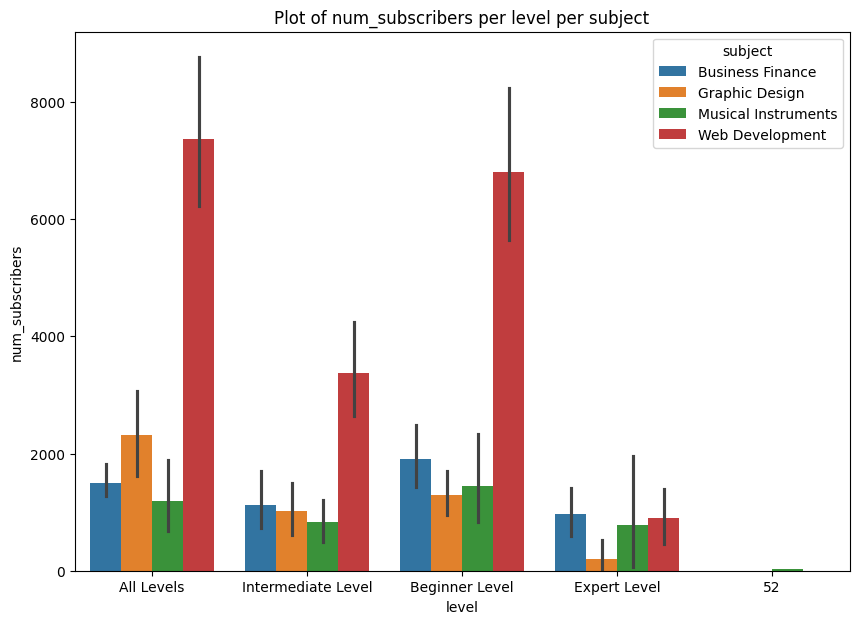

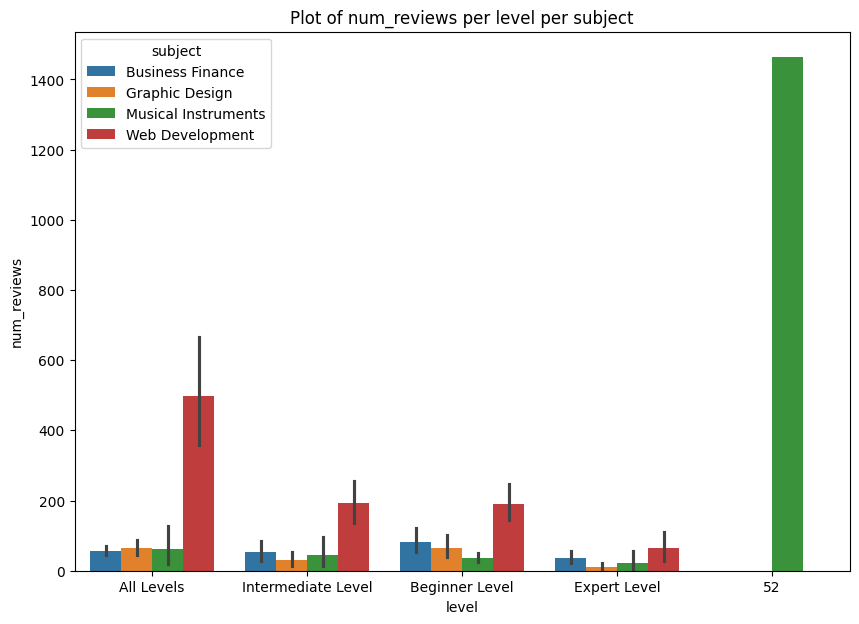

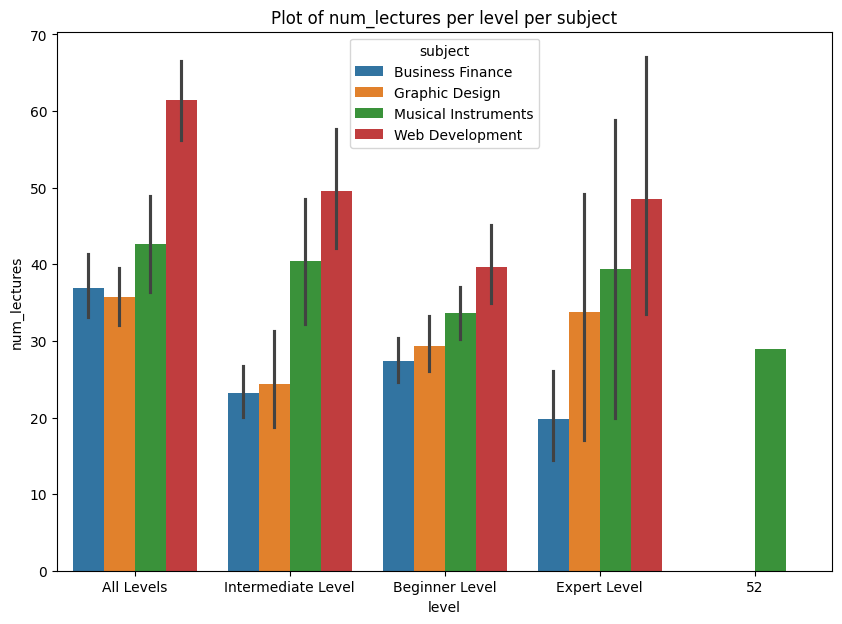

In [ ]:
# Implement function to plot bar charts for
# multiple features by level and subject

def plotdata(df,feature):
  plt.figure(figsize=(10,7))
  plt.title('Plot of {} per level per subject'.format(feature))
  sn.barplot(x='level', y=feature, data=df, hue='subject')
  plt.show()

featureslist = ['num_subscribers','num_reviews','num_lectures']
for feature in featureslist:
    plotdata(df,feature)

#**EDA on Price**
  * Price
    * What is the average price of a course
    * What is the min/max price
    * How much does Udemy earn
    * The most profitable courses

In [ ]:
# List distinct price values

df['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135])

In [ ]:
# Replace 'TRUE' and 'Free' with 0 in price column and extract unique prices

df['price'] = df['price'].astype(str).str.replace('TRUE|Free', '0', regex=True)
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', '0', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135'],
      dtype=object)

In [ ]:
# Convert price column to float type

df['price'] = df['price'].astype('float')

<Axes: xlabel='price'>

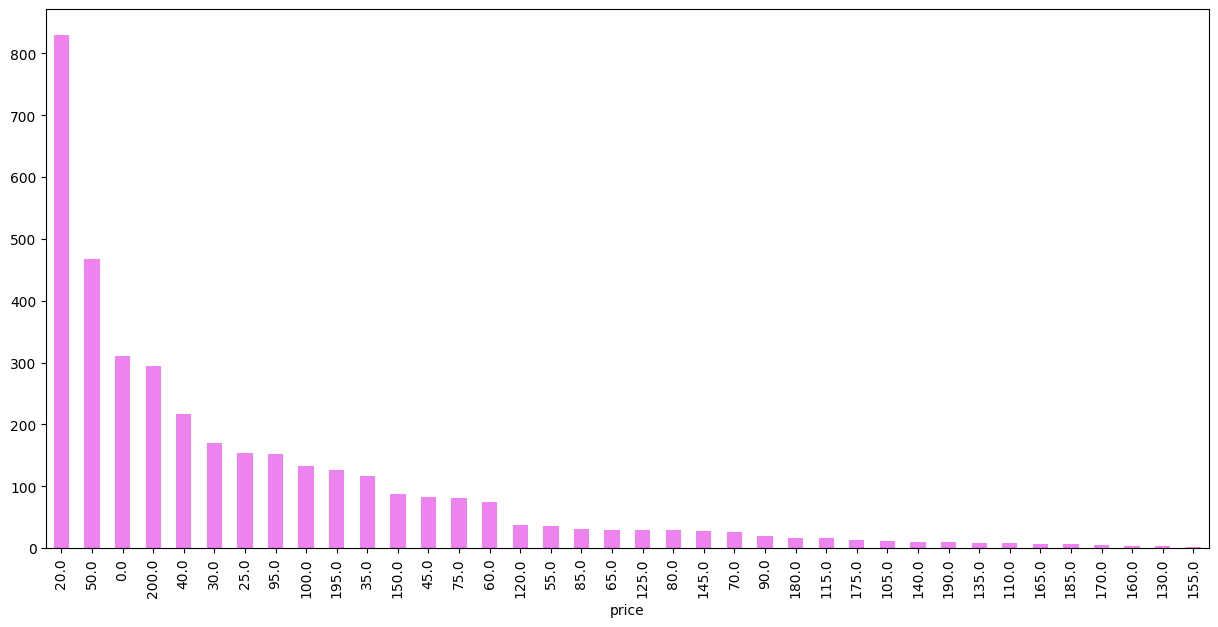

In [ ]:
# Create bar chart visualization of price value counts

plt.figure(figsize=(15,7))
df['price'].value_counts().plot(kind='bar',color='violet')

In [ ]:
# Add profit column as product of price and number of subscribers

df['profit'] = df['price'] * df['num_subscribers']
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200.0,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400.0,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75.0,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400.0,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45.0,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830.0,2016-12-19,19:26:30Z,2016,12,19


In [ ]:
# Highlight row with maximum profit using plasma gradient style

df[df['profit'] == df['profit'].max()].style.background_gradient('plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
3235,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200.000000,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development,24316800.000000,2015-11-02,21:13:27Z,2015,11,2


In [ ]:
# Access row at index 3235 using iloc for inspection

df.iloc[3235]

,3235
course_id,625204
course_title,The Web Developer Bootcamp
url,https://www.udemy.com/the-web-developer-bootcamp/
is_paid,True
price,200.0
num_subscribers,121584
num_reviews,27445
num_lectures,342
level,All Levels
content_duration,43 hours


In [ ]:
# Highlight row with minimum profit using plasma gradient style

df[df['profit'] == df['profit'].min()].style.background_gradient(cmap='plasma')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
97,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-basics/,False,0.000000,1514,66,11,Beginner Level,33 mins,2017-03-23T22:19:57Z,Business Finance,0.000000,2017-03-23,22:19:57Z,2017,3,23
105,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-the-stock-market/,False,0.000000,50855,2698,15,Beginner Level,1.5 hours,2013-12-25T19:53:34Z,Business Finance,0.000000,2013-12-25,19:53:34Z,2013,12,25
108,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-trading/,False,0.000000,17160,620,23,All Levels,1 hour,2014-08-29T20:10:38Z,Business Finance,0.000000,2014-08-29,20:10:38Z,2014,8,29
110,923616,Website Investing 101 - Buying & Selling Online Businesses,https://www.udemy.com/cash-flow-website-investing-buy-sell-online-businesses-digital-assets/,False,0.000000,6811,151,51,All Levels,2 hours,2016-08-05T17:03:15Z,Business Finance,0.000000,2016-08-05,17:03:15Z,2016,8,5
114,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-stock-market-beginners/,False,0.000000,19339,794,9,Beginner Level,2 hours,2014-03-31T21:35:06Z,Business Finance,0.000000,2014-03-31,21:35:06Z,2014,3,31
121,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimplemodel/,False,0.000000,29167,1463,8,Intermediate Level,1.5 hours,2014-05-27T16:22:16Z,Business Finance,0.000000,2014-05-27,16:22:16Z,2014,5,27
130,777444,Corporate Finance - A Brief Introduction,https://www.udemy.com/finance-a-brief-introduction-and-basics-finance-101/,False,0.000000,11724,649,17,Beginner Level,1.5 hours,2016-03-04T05:58:09Z,Business Finance,0.000000,2016-03-04,05:58:09Z,2016,3,4
145,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes-a-brief-introduction/,False,0.000000,56659,4397,16,Beginner Level,1.5 hours,2013-04-07T21:39:25Z,Business Finance,0.000000,2013-04-07,21:39:25Z,2013,4,7
181,1188742,Introduction to Cryptocurrencies and Blockchain,https://www.udemy.com/introduction-to-cryptocurrencies/,False,0.000000,3775,138,11,Beginner Level,2 hours,2017-05-01T21:18:54Z,Business Finance,0.000000,2017-05-01,21:18:54Z,2017,5,1
195,919906,Trading Options For Consistent Returns: Options Basics,https://www.udemy.com/trading-options-for-income/,False,0.000000,4077,281,20,Beginner Level,1.5 hours,2016-08-18T21:57:04Z,Business Finance,0.000000,2016-08-18,21:57:04Z,2016,8,18


In [ ]:
# Retrieve unique values from 'is_paid' column

df = pd.read_csv('sample_data/udemy_course_data.csv', dtype={'is_paid': 'object'})
print(df['is_paid'].unique())

['True' 'False']


In [ ]:
# Map string values to booleans in 'is_paid' column

paid_dict = {'True':True,'False':False,'FALSE':False,
             'TRUE':True,'https://www.udemy.com/learnguitartoworship/':True}
df['is_paid'] = df['is_paid'].map(paid_dict)
df['is_paid'].unique()

array([ True, False])

<Axes: xlabel='is_paid', ylabel='count'>

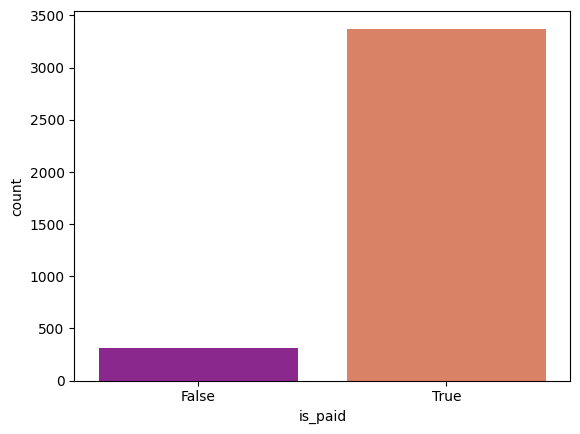

In [ ]:
# Add countplot for is_paid variable with plasma palette

sn.countplot(x='is_paid', hue='is_paid', data=df, palette='plasma', legend=False)

In [ ]:
# Summarize subject frequencies by is_paid status

df.groupby(['is_paid'])['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     635
         Graphic Design          568
Name: count, dtype: int64

<Axes: xlabel='is_paid,subject'>

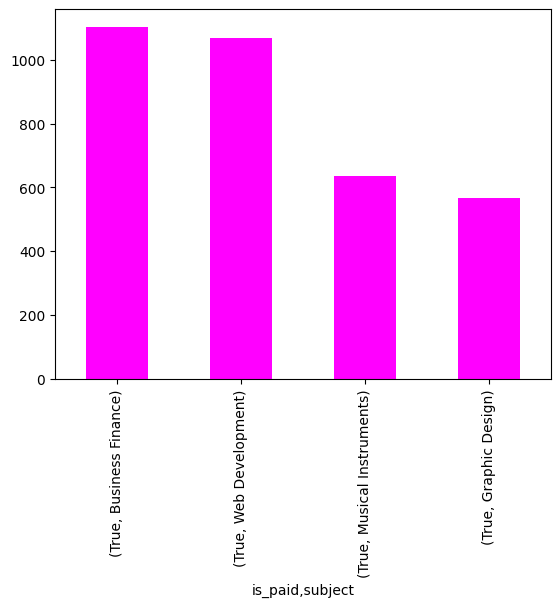

In [ ]:
# Visualize subject counts for paid users with magenta bar plot

df[df['is_paid']==True].groupby(['is_paid'])['subject'].value_counts().plot(kind='bar',color='magenta')

<Axes: xlabel='is_paid,subject'>

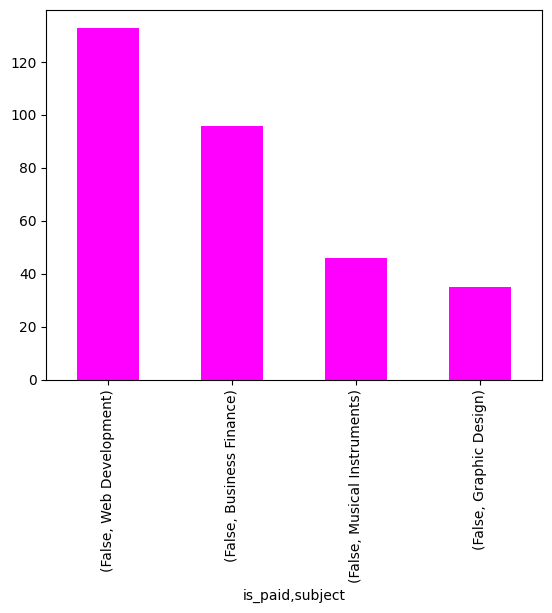

In [ ]:
# Plot subject counts for unpaid users with magenta bar chart

df[df['is_paid']==False].groupby(['is_paid'])['subject'].value_counts().plot(kind='bar',color='magenta')

#**Correlation Question**
  * Correlation Questions
    * Does number of subscribers depend on:
      * Number of reviews
      * Price
      * Number of lectures
      * Content duration

In [ ]:
# Display DataFrame column names

df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

<Axes: xlabel='price', ylabel='num_subscribers'>

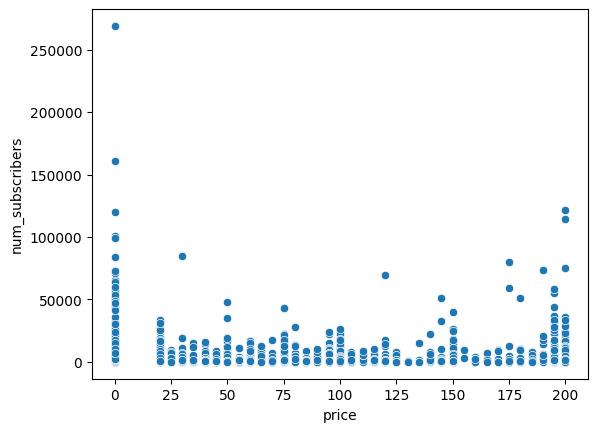

In [ ]:
# Scatterplot of price vs. number of subscribers

sn.scatterplot(data=df,x='price',y='num_subscribers')

<Axes: xlabel='price', ylabel='num_reviews'>

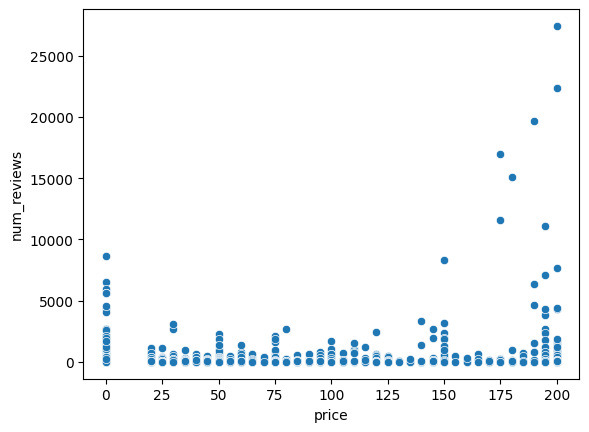

In [ ]:
# Scatterplot of price vs. number of reviews

sn.scatterplot(data=df,x='price',y='num_reviews')

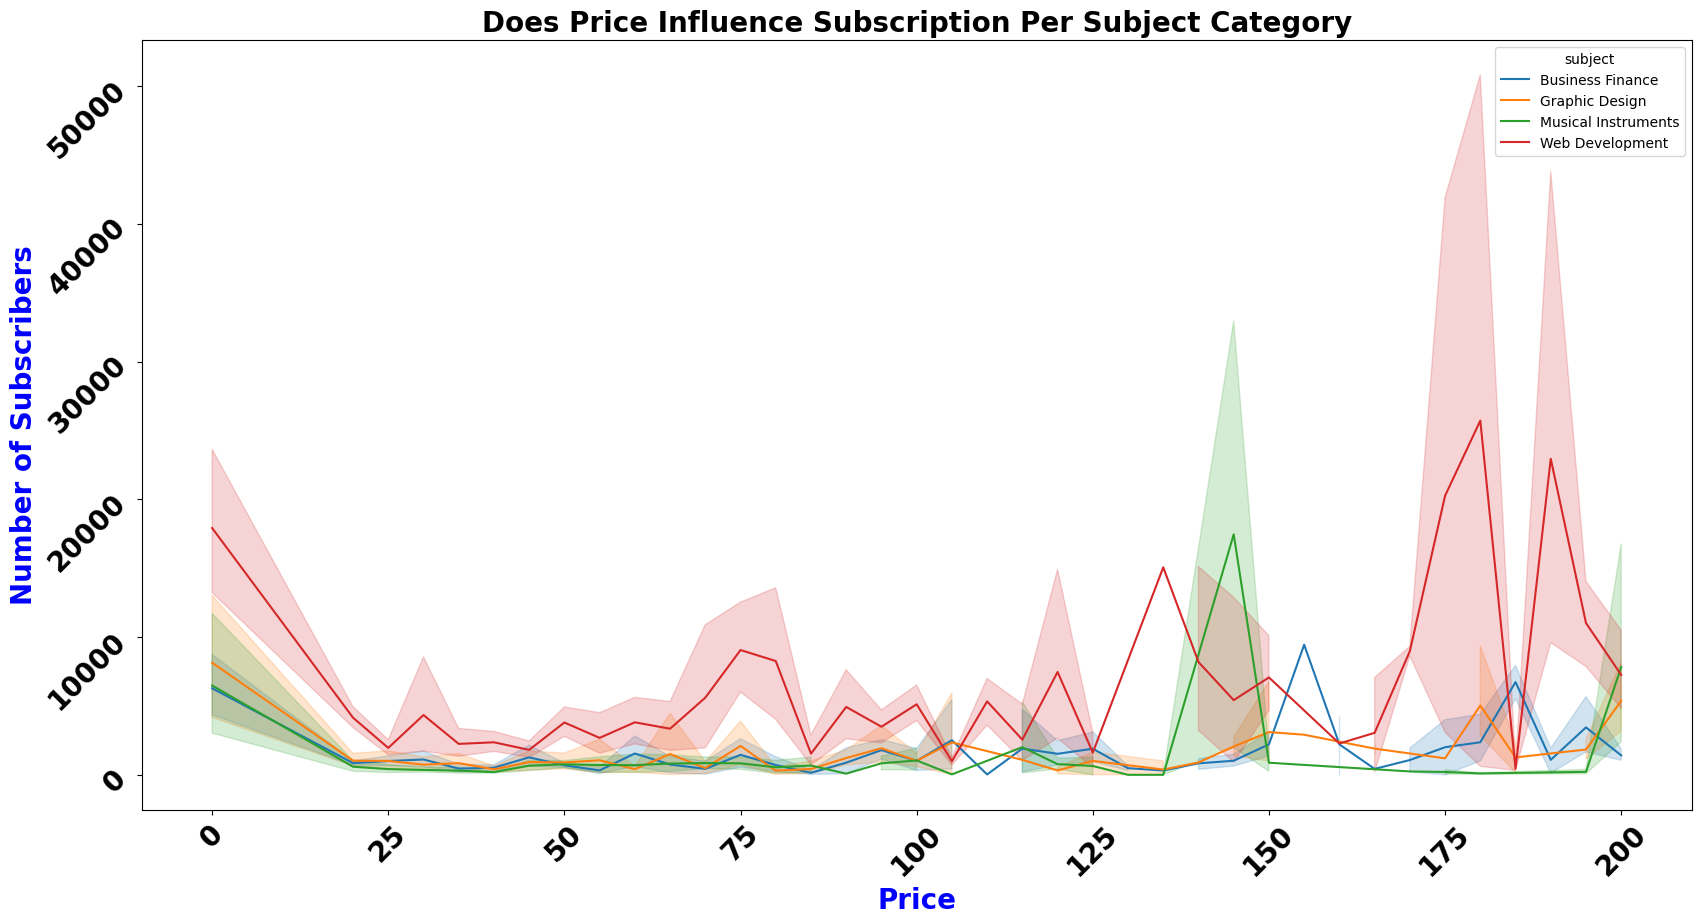

In [ ]:
# Add lineplot visualizing price vs. number of subscribers by subject

plt.figure(figsize=(20,10))
plt.title('Does Price Influence Subscription Per Subject Category',
          fontsize=20, fontweight='bold')
sn.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.xticks(fontsize=20,fontweight='bold',rotation=45)
plt.yticks(fontsize=20,fontweight='bold',rotation=45)
plt.xlabel('Price',fontsize=20,fontweight='bold',color='blue')
plt.ylabel('Number of Subscribers',fontsize=20,fontweight='bold',color='blue')
plt.show()


#**Question on Time**
  * Published Year
    * Number of courses per year
    * Distribution of subjects per year
    * Which year has the highest number of courses
    * What is the trend of courses per year

In [ ]:
# Display first rows of published_timestamp column

df['published_timestamp'].head()

,published_timestamp
0,2017-01-18T20:58:58Z
1,2017-03-09T16:34:20Z
2,2016-12-19T19:26:30Z
3,2017-05-30T20:07:24Z
4,2016-12-13T14:57:18Z


In [ ]:
# Extract date from published_timestamp into published_date

df['published_date'] = df['published_timestamp'].apply(lambda x:x.split('T')[0])

In [ ]:
# Display first two rows of DataFrame

df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9


In [ ]:
# Fix ValueError: time data "3 hours" doesn't match format "%Y-%m-%d", at position 2066.

df[df['published_date']=='3 hours']
df = df.drop(df.index[2066])
df[df['published_date']=='3 hours']

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day


In [ ]:
# Convert the published date to pandas datetime object

df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")

In [ ]:
# Add columns for Year, Month, Day, and Month_name derived from 'published_date'

df['Year'] = df['published_date'].dt.year
df['Month'] = df['published_date'].dt.month
df['Day'] = df['published_date'].dt.day
df['Month_name'] = df['published_date'].dt.month_name()
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,...,429400,2017-01-18,20:58:58Z,2017,1,18,2017,1,18,January
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,...,209400,2017-03-09,16:34:20Z,2017,3,9,2017,3,9,March
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,...,97830,2016-12-19,19:26:30Z,2016,12,19,2016,12,19,December
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,...,232845,2017-05-30,20:07:24Z,2017,5,30,2017,5,30,May
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,...,255200,2016-12-13,14:57:18Z,2016,12,13,2016,12,13,December


In [ ]:
# Display DataFrame column names for dataset exploration

df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day', 'Year',
       'Month', 'Day', 'Month_name'],
      dtype='object')

Text(0, 0.5, 'Profit')

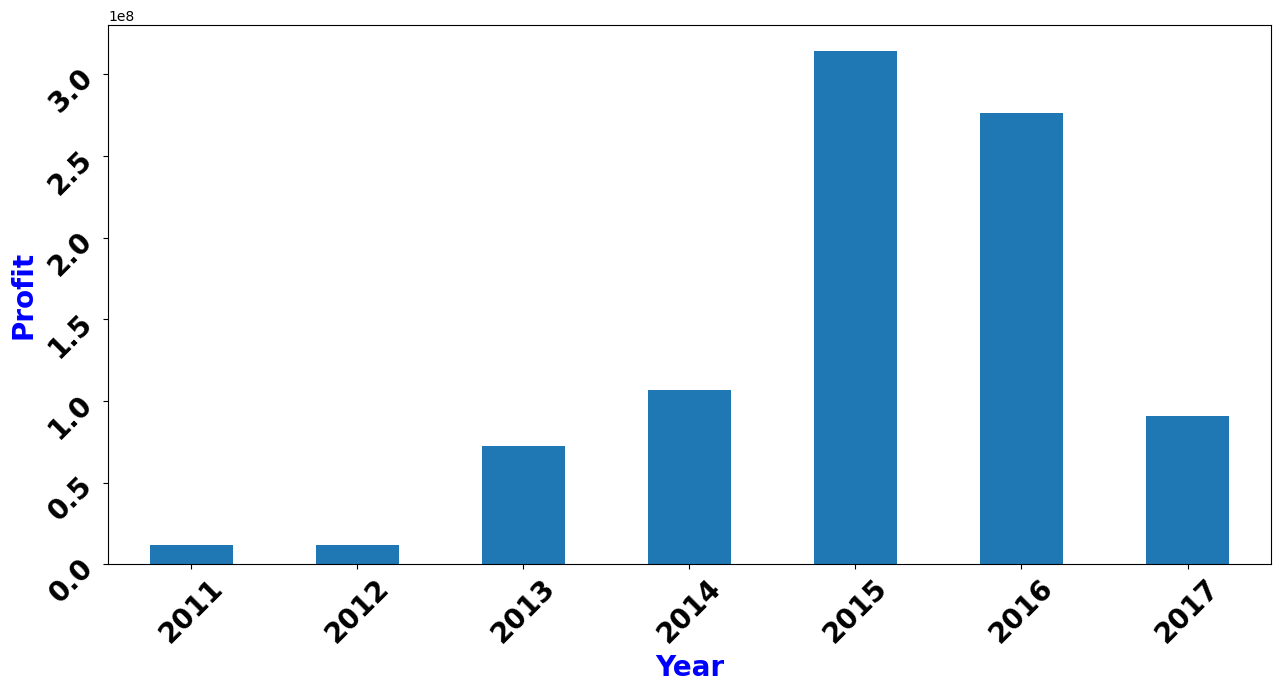

In [ ]:
# Visualize yearly profit totals with styled bar chart

plt.figure(figsize=(15,7))
df.groupby(['Year'])['profit'].sum().plot(kind='bar')
plt.xticks(fontsize=20,fontweight='bold',rotation=45)
plt.yticks(fontsize=20,fontweight='bold',rotation=45)
plt.xlabel('Year',fontsize=20,fontweight='bold',color='blue')
plt.ylabel('Profit',fontsize=20,fontweight='bold',color='blue')

Text(0, 0.5, 'Profit')

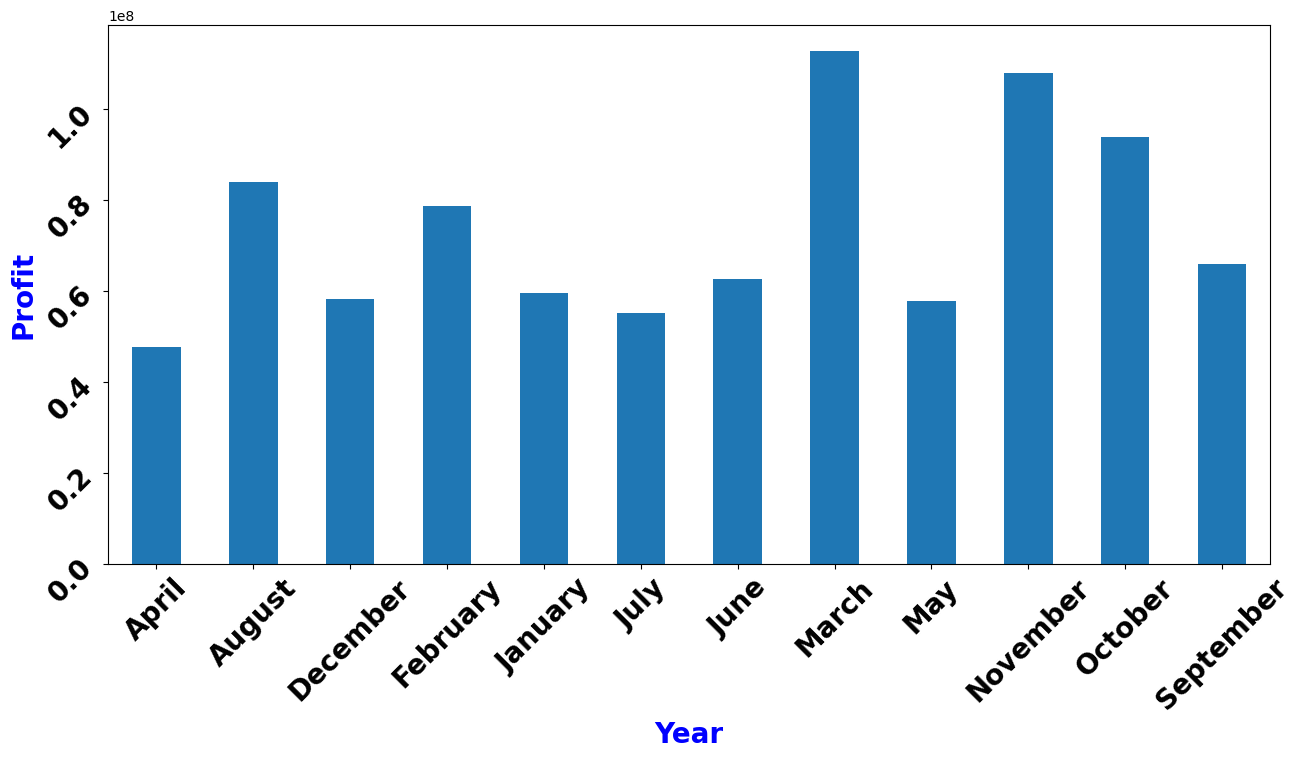

In [ ]:
# Visualize monthly profit with customized bar chart

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Number of Subscribers')

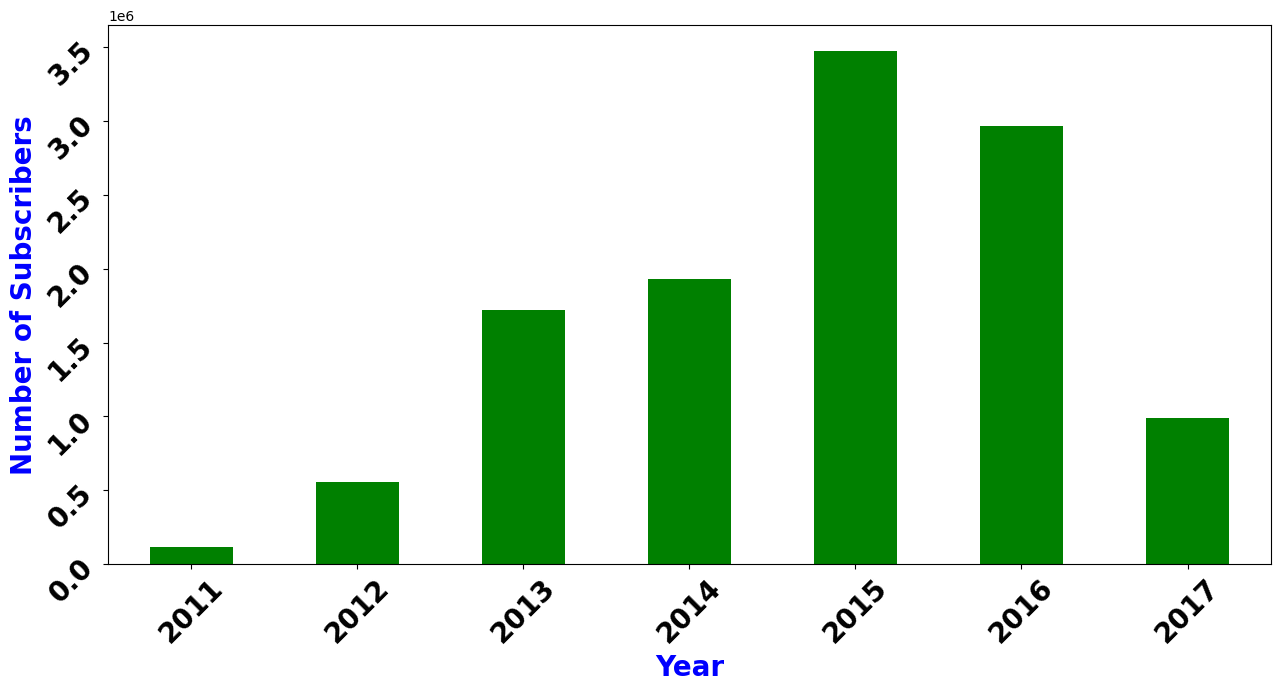

In [ ]:
# Visualize annual subscriber totals in green bar chart

plt.figure(figsize=(15,7))
df.groupby(['Year'])['num_subscribers'].sum().plot(kind = 'bar',color = 'green')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Number of Subscribers')

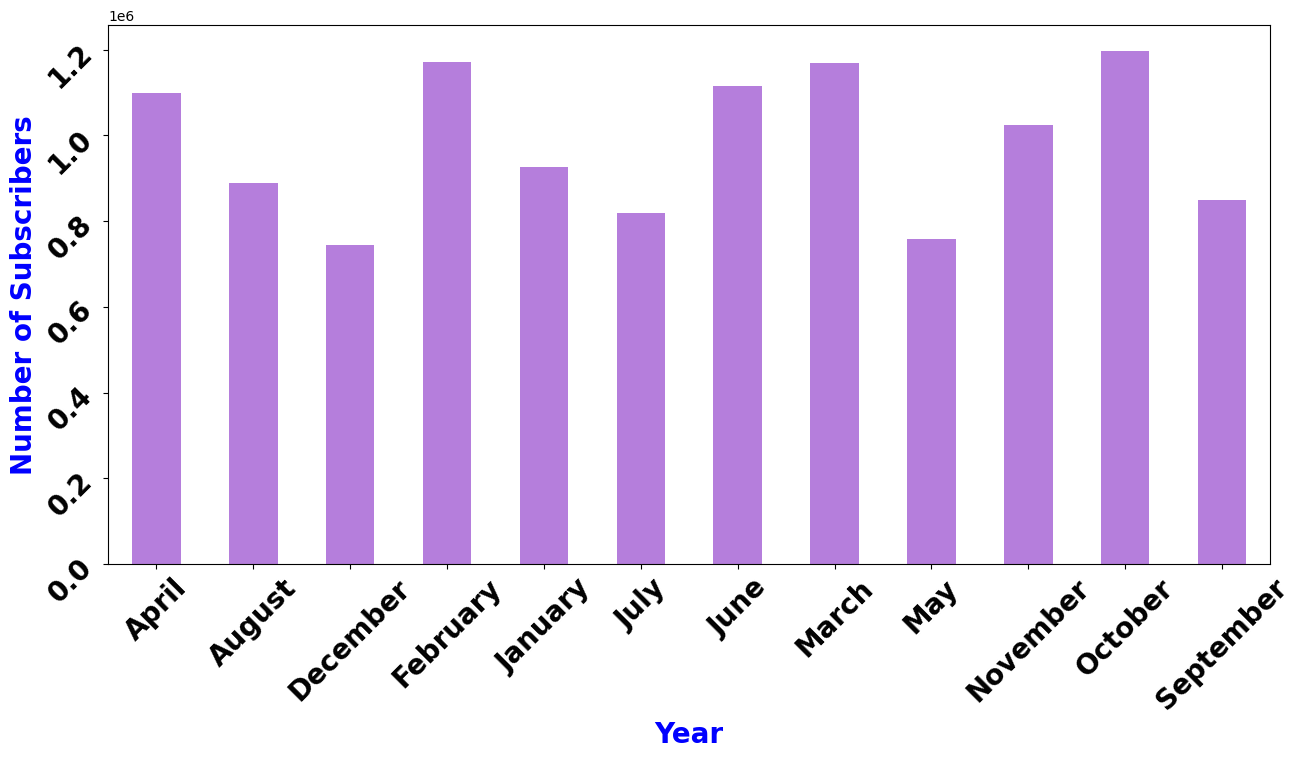

In [ ]:
# Visualize monthly subscribers with styled bar chart

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['num_subscribers'].sum().plot(kind = 'bar',
                                                         color = '#b57edc')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

#Questions on Course Title
  * Course Title
    * What is the most frequent words in course title
    * Longest/Shortest course title
    * How can we build recommendation systems via title using similarity
    * Most famous courses by number of subscribers

In [ ]:
# Show first 3 rows of dataframe

df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,...,429400,2017-01-18,20:58:58Z,2017,1,18,2017,1,18,January
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,...,209400,2017-03-09,16:34:20Z,2017,3,9,2017,3,9,March
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,...,97830,2016-12-19,19:26:30Z,2016,12,19,2016,12,19,December


In [ ]:
# Filter rows with longest course title

df[df['course_title'].str.len()==max(df['course_title'].str.len())]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
2191,286898,Aprende a tocar el Acordeón 'de oído y con téc...,https://www.udemy.com/aprende-los-secretos-de-...,True,75,158,17,59,All Levels,2.5 hours,...,11850,2014-07-28,13:55:43Z,2014,7,28,2014,7,28,July


In [ ]:
# Access course title at specific index

df['course_title'].iloc[2190]

'Aprende a tocar el Acordeón \'de oído y con técnica",https://www.udemy.com/aprende-a-tocar-el-acordeon-de-oido-y-con-tecnica/,true,25,93,21,34,Beginner Level,4 hours,2014-09-16T19:51:45Z\n263432,Aprende los Secretos de la Armónica con HARP&SOUL"'

In [ ]:
# Access row at index 2190 in dataframe

df.iloc[2190]


,2191
course_id,286898
course_title,Aprende a tocar el Acordeón 'de oído y con téc...
url,https://www.udemy.com/aprende-los-secretos-de-...
is_paid,True
price,75
num_subscribers,158
num_reviews,17
num_lectures,59
level,All Levels
content_duration,2.5 hours


In [ ]:
# Filter rows with maximum number of reviews

df[df['num_reviews']==max(df['num_reviews'])]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
3235,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43 hours,...,24316800,2015-11-02,21:13:27Z,2015,11,2,2015,11,2,November


In [ ]:
# Filter rows with shortest course title

df[df['course_title'].str.len()==min(df['course_title'].str.len())]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,...,profit,published_date,published_time,year,month,day,Year,Month,Day,Month_name
1328,1164570,调色高级讲解,https://www.udemy.com/dezepioy/,True,200,4,2,8,Beginner Level,1 hour,...,800,2017-03-31,17:16:15Z,2017,3,31,2017,3,31,March
1674,1164720,调色中级课程,https://www.udemy.com/ixlnjjvn/,True,200,5,3,7,Beginner Level,1 hour,...,1000,2017-03-31,17:19:38Z,2017,3,31,2017,3,31,March


In [ ]:
# Access course title at index 1327

df['course_title'].iloc[1327]

'超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜'

In [ ]:
# Access dataframe row at index 1327

df.iloc[1327]

,1327
course_id,1009622
course_title,超基礎！超入門！〜作りながら学ぶ。完全無料3DCGソフトBlender〜
url,https://www.udemy.com/blender-beginner/
is_paid,True
price,80
num_subscribers,8
num_reviews,1
num_lectures,43
level,Beginner Level
content_duration,5.5 hours


#**Keyword Extraction**
  * Rake
  * Yakes
  * Collection

In [ ]:
# Install the NeatText Python package

!pip install neattext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Import neattext functions module

import neattext.functions as nfx

In [ ]:
# Import neattext functions and list available methods

import neattext.functions as nfx
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
# Clean course titles by removing short words and preview

df['Clean_title'] = df['course_title'].apply(nfx.remove_shortwords)
df['Clean_title'].iloc[1:5]

,Clean_title
1,Complete Course Certification Grow Your Practice
2,Financial Modeling Business Analysts Consultants
3,Beginner Financial Analysis Excel 2017
4,Maximize Your Profits Trading Options


In [ ]:
# Create dataframe subset of clean and original titles and preview

temp = df[['Clean_title','course_title']]
temp.head()

,Clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete Course Certification Grow Your Practice,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Your Profits Trading Options,How To Maximize Your Profits Trading Options


In [75]:
# Filter rows with longest clean title

temp[temp['Clean_title'].str.len()==max(temp['Clean_title'].str.len())]

,Clean_title,course_title
293,Multiply your returns using Value Investing ht...,"Multiply your returns using 'Value Investing"",..."


In [76]:
# Access 'Clean_title' value at index 293

temp['Clean_title'].iloc[293]

'Multiply your returns using Value Investing https udemy multiply your returns using value investing true 1942 Levels hours 2015 23T00 874284 Weekly Forex Analysis Baraq'

In [77]:
# Access 'clean_title' value at index 293

temp['course_title'].iloc[293]

'Multiply your returns using \'Value Investing",https://www.udemy.com/multiply-your-returns-using-value-investing/,true,20,1942,19,63,All Levels,4.5 hours,2015-07-23T00:08:33Z\n874284,Weekly Forex Analysis by Baraq FX"'

In [78]:
# Clean 'Clean_title' column by removing special characters and preview

df['Clean_title'] = df['Clean_title'].apply(nfx.remove_special_characters)
df['Clean_title'].iloc[1:5]

,Clean_title
1,Complete Course Certification Grow Your Practice
2,Financial Modeling Business Analysts Consultants
3,Beginner Financial Analysis Excel 2017
4,Maximize Your Profits Trading Options


In [79]:
# Convert 'Clean_title' column to list and preview elements

all_title_list = df['Clean_title'].to_list()
all_title_list[1:5]

['Complete Course Certification Grow Your Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Financial Analysis Excel 2017',
 'Maximize Your Profits Trading Options']

In [80]:
# Tokenize all titles into words and preview sample tokens

alltokens = [token for line in all_title_list for token in line.split()]
print(len(alltokens))
print(alltokens[1:4])

18227
['Investment', 'Banking', 'Course']


In [82]:
# Compute frequency of top 50 tokens

from collections import Counter
freq_words = dict(Counter(alltokens).most_common(50))
freq_words

{'Learn': 495,
 'Trading': 281,
 'with': 278,
 'Course': 235,
 'Beginners': 235,
 'Guitar': 211,
 'Design': 189,
 'Complete': 181,
 'Piano': 179,
 'Photoshop': 169,
 'Forex': 165,
 'Build': 164,
 'Financial': 139,
 'Beginner': 138,
 'Create': 136,
 'JavaScript': 124,
 'Your': 119,
 'HTML': 118,
 'Guide': 116,
 'Accounting': 114,
 'Website': 111,
 'from': 111,
 'Development': 110,
 'Options': 101,
 'From': 101,
 'Play': 100,
 'Adobe': 100,
 'With': 99,
 'Introduction': 93,
 'Master': 92,
 'Illustrator': 90,
 'Basics': 89,
 'Scratch': 83,
 'WordPress': 83,
 'Level': 80,
 'Professional': 79,
 'Analysis': 78,
 'Advanced': 77,
 'Easy': 76,
 'Lessons': 73,
 'HTML5': 68,
 'Trade': 66,
 'Stock': 65,
 'Bootstrap': 64,
 'Business': 62,
 'play': 61,
 'Angular': 58,
 'your': 57,
 'Building': 56,
 'Stocks': 55}

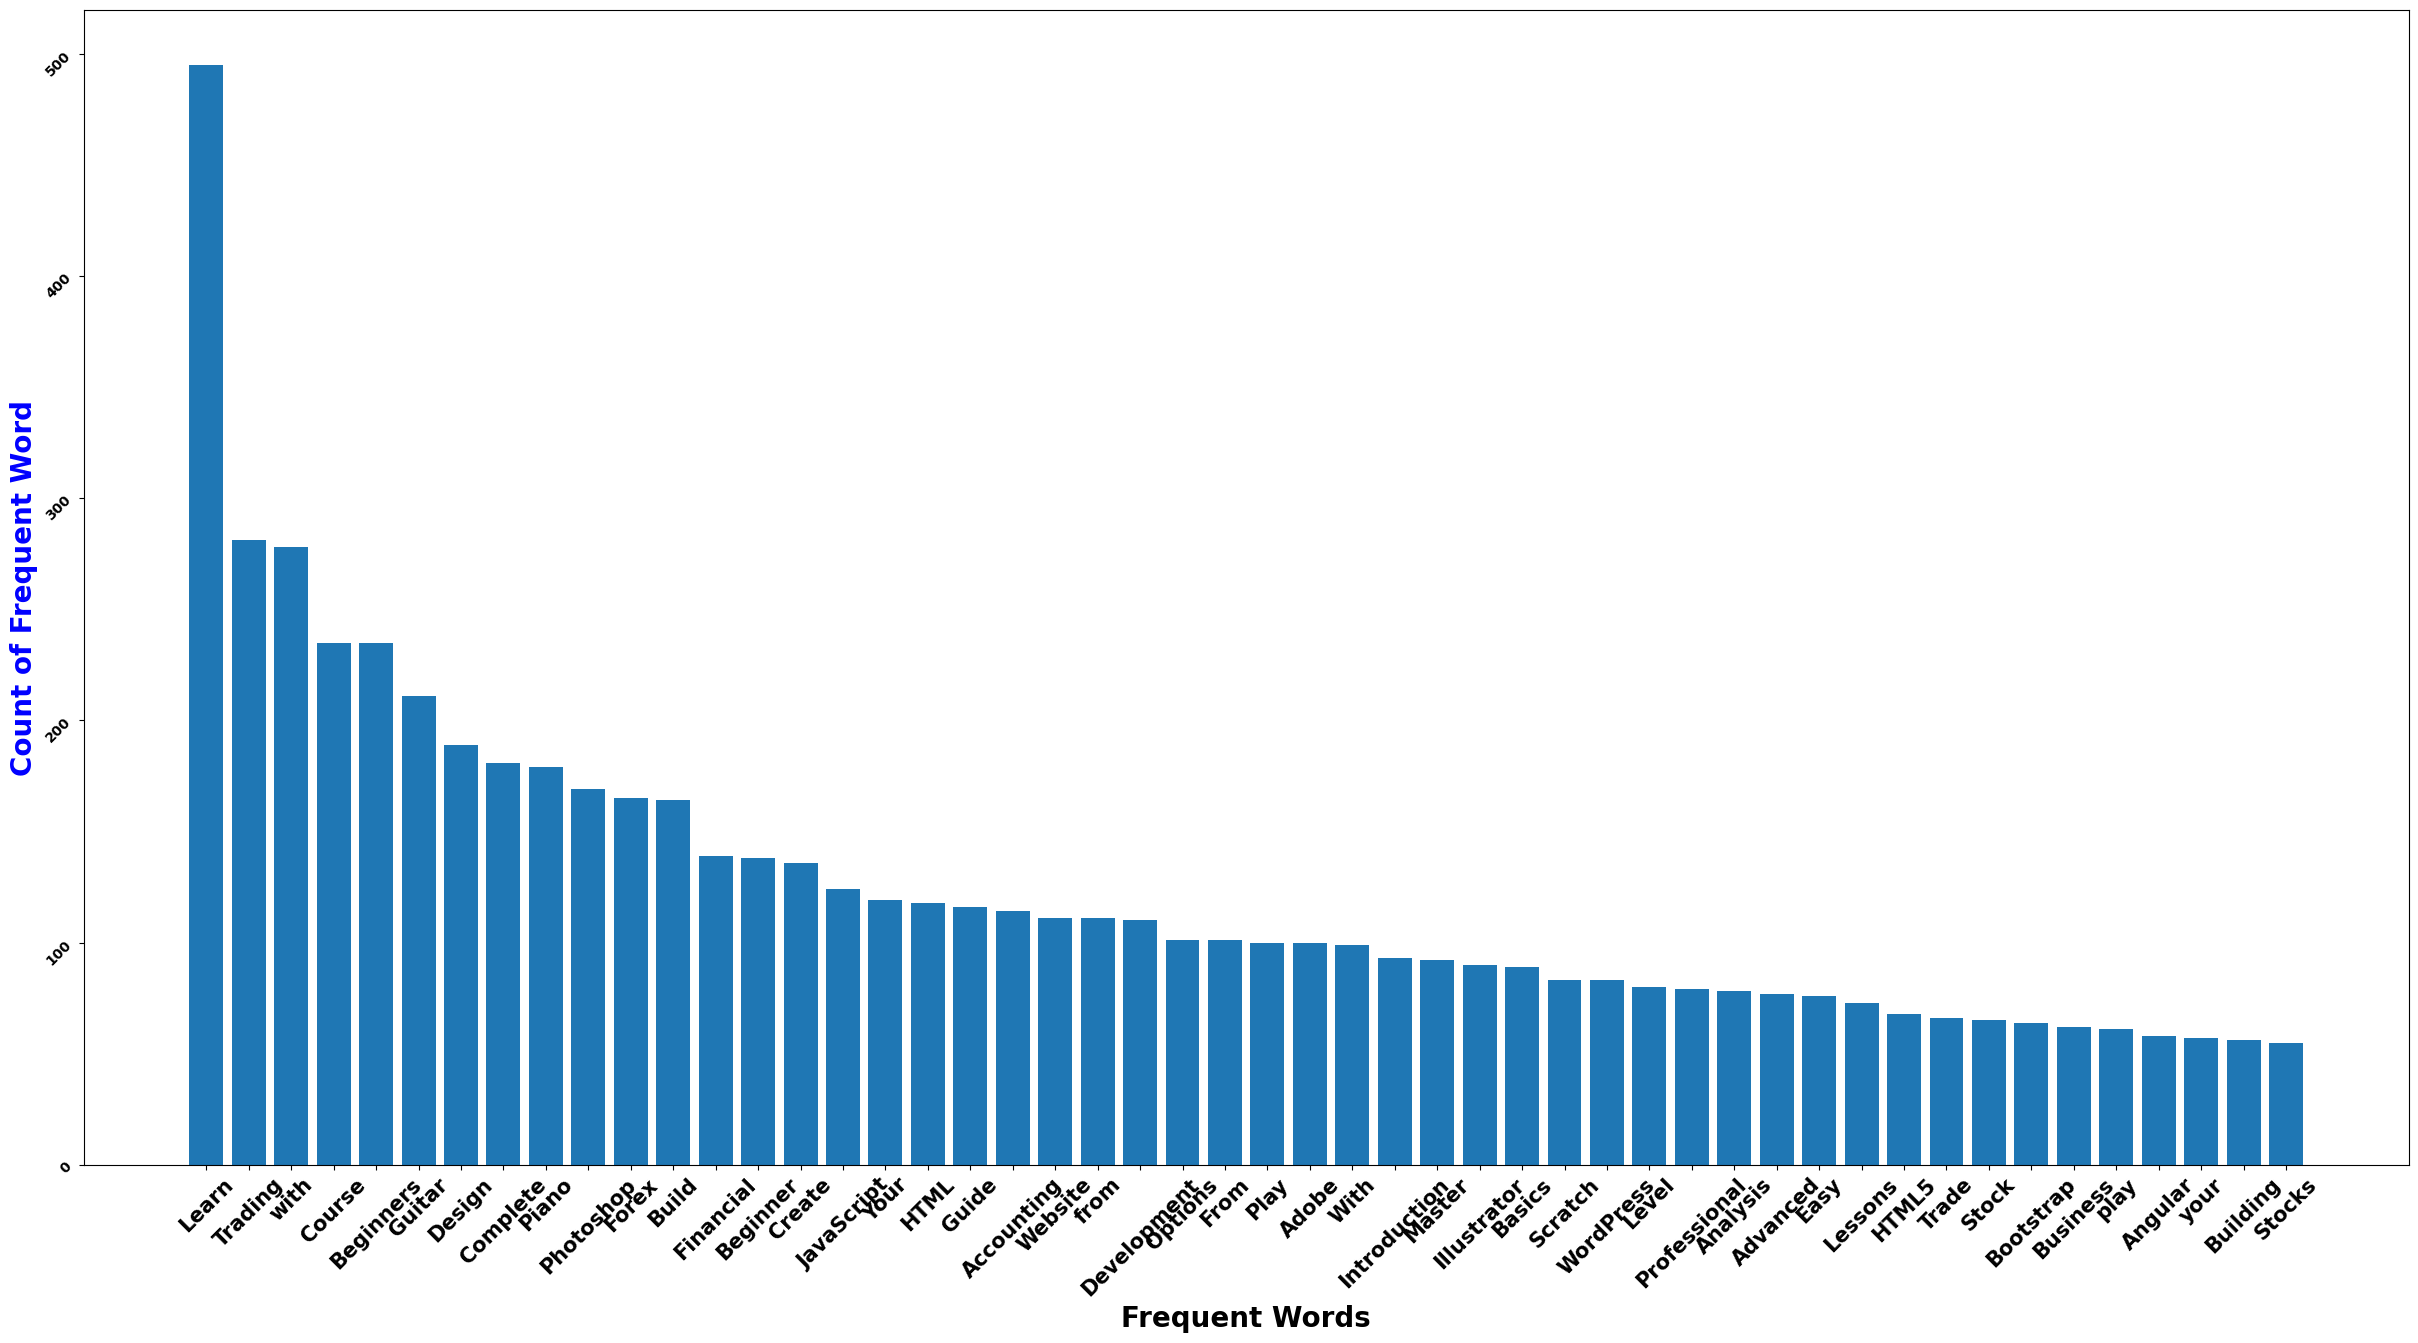

In [84]:
# Create bar chart of frequent words with customized labels and styling

plt.figure(figsize=(30,15))
plt.bar(*zip(*freq_words.items()))
plt.xticks(rotation=45)

plt.xticks(fontsize=15,fontweight='bold',rotation=45)
plt.yticks(fontsize=10,fontweight='bold',rotation=45)
plt.xlabel('Frequent Words',fontsize=20,fontweight='bold')
plt.ylabel('Count of Frequent Word',fontsize=20,fontweight='bold',color='blue')
plt.show()